# Rendering 3D model

### Import packages

In [1]:
import open3d
import os
import sys
import torch
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# Util function for loading meshes
from pytorch3d.io import load_objs_as_meshes

# Data structures and functions for rendering
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    PerspectiveCameras,
    PointLights,
    Materials,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer
)

from pytorch3d.renderer.mesh.shader import HardPhongShader

sys.path.append(os.path.abspath(''))

### Load meshes and visualize it with Open3D

In [3]:
mesh_file = "./data/cow_mesh/cow.obj"
print('visualizing the mesh using open3D')
mesh = open3d.io.read_triangle_mesh(mesh_file)
open3d.visualization.draw_geometries([mesh],
                                     mesh_show_wireframe = True,
                                     mesh_show_back_face = True,
                                     )

visualizing the mesh using open3D


### Define the cameras and light sources and a renderer variable

In [4]:
# Set paths
DATA_DIR = "./data"
obj_filename = os.path.join(DATA_DIR, "cow_mesh/cow.obj")
device = torch.device('cuda')

# Load obj file
mesh = load_objs_as_meshes([obj_filename], device=device)

R, T = look_at_view_transform(2.7, 0, 180)
cameras = PerspectiveCameras(device=device, R=R, T=T)

raster_settings = RasterizationSettings(
    image_size=512,
    blur_radius=0.0,
    faces_per_pixel=1,
)
lights = PointLights(device=device, location=[[0.0, 0.0, -3.0]])
renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=cameras,
        raster_settings=raster_settings
    ),
    shader = HardPhongShader(
        device = device,
        cameras = cameras,
        lights = lights
    )
)

### First rendering results

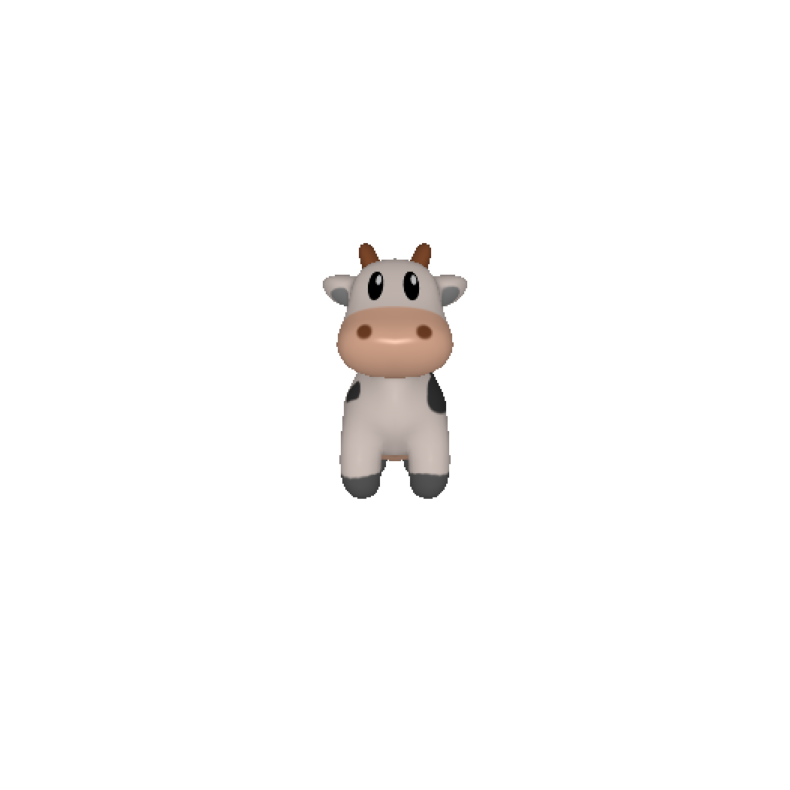

In [6]:
images = renderer(mesh)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off")
plt.savefig('light_at_front.png')

### Change the location of the light source to the back of the mesh

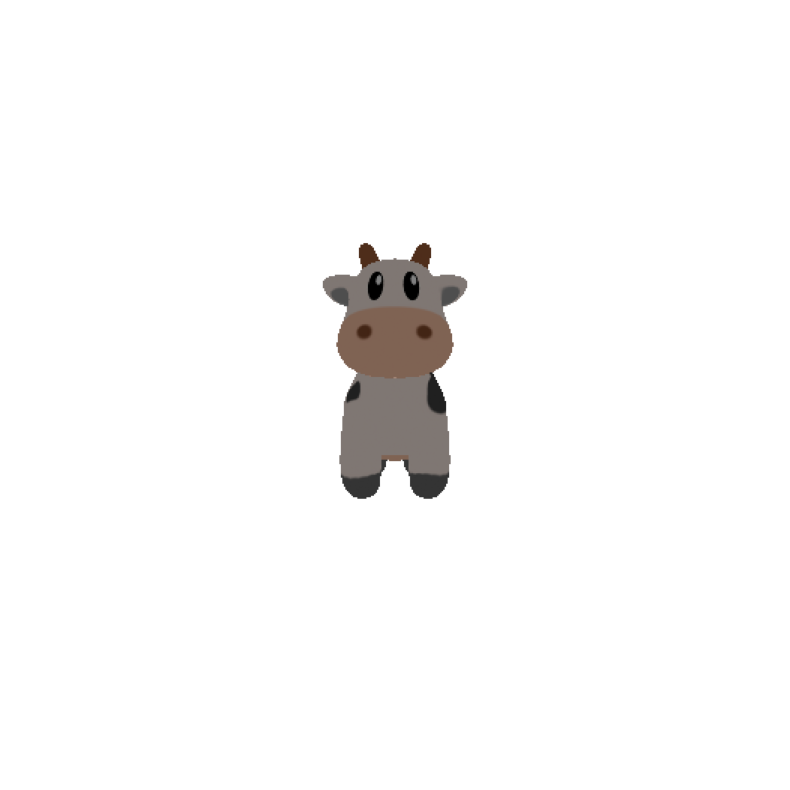

In [7]:
lights.location = torch.tensor([0.0, 0.0, +1.0], device=device)[None]
images = renderer(mesh, lights=lights, )

plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off");
plt.savefig('light_at_back.png')

### Define a materials data structure

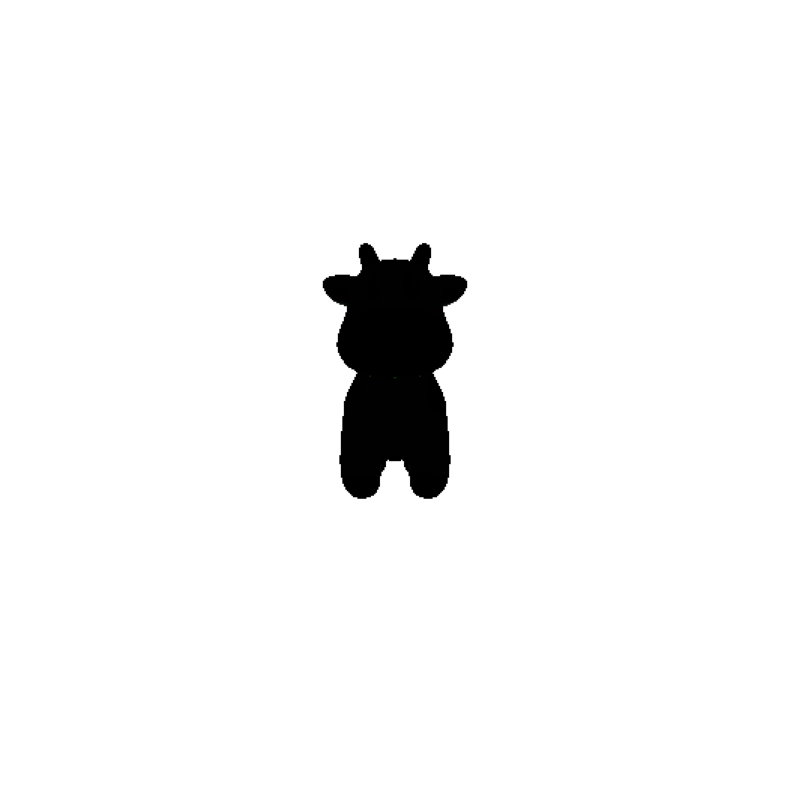

In [8]:
lights.location = torch.tensor([0.0, 0.0, +1.0], device=device)[None]
materials = Materials(
    device=device,
    specular_color=[[0.0, 1.0, 0.0]],
    shininess=10.0,
    ambient_color=((0.01, 0.01, 0.01),),
)
images = renderer(mesh, lights=lights, materials = materials)

plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off")
plt.savefig('dark.png')

### Rotate the camera again and redefine the light source location

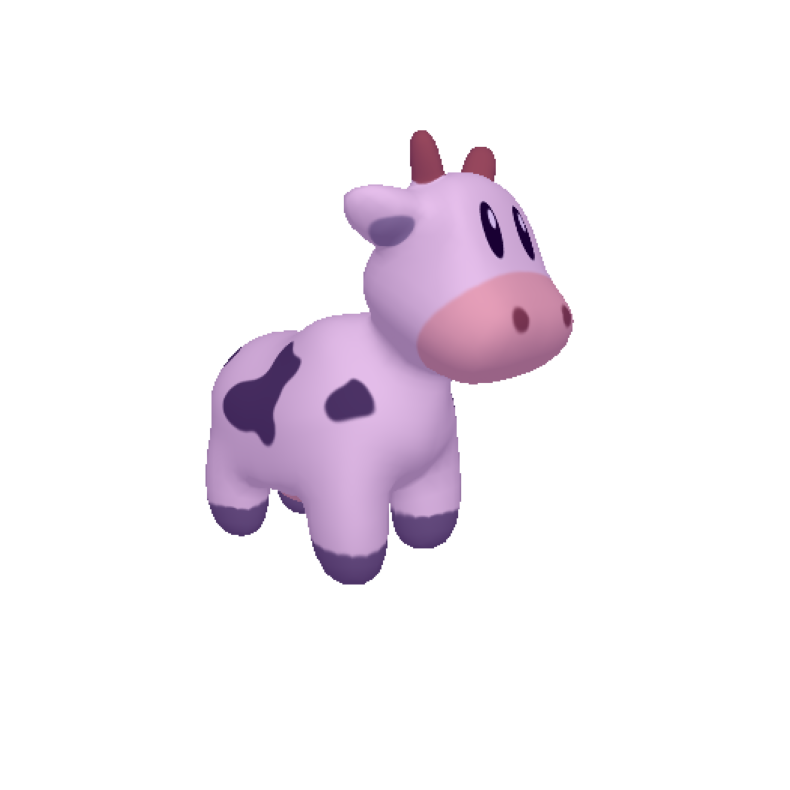

In [9]:
R, T = look_at_view_transform(dist=2.7, elev=10, azim=-230)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

lights.location = torch.tensor([[2.0, 2.0, -2.0]], device=device)

materials = Materials(
    device=device,
    specular_color=[[0.5, 0.0, 1.0]],
    shininess=0.0
)

images = renderer(mesh, lights=lights, materials=materials, cameras=cameras)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off")
plt.savefig('rotated.png')

### Change shininess

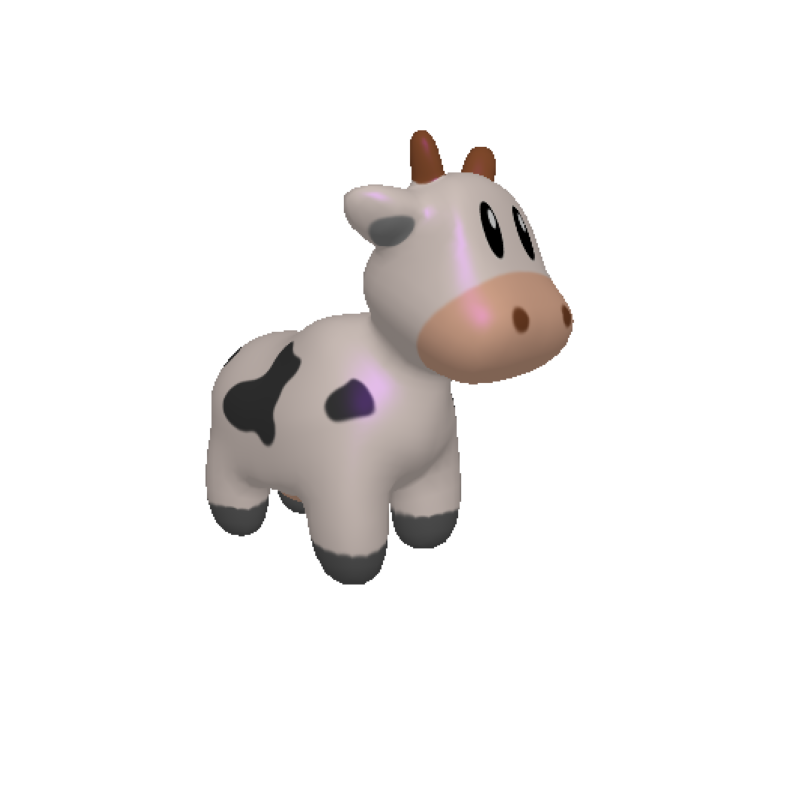

In [11]:
R, T = look_at_view_transform(dist=2.7, elev=10, azim=-230)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

lights.location = torch.tensor([[2.0, 2.0, -2.0]], device=device)

materials = Materials(
    device=device,
    specular_color=[[0.5, 0.0, 1.0]],
    shininess=10.0
)

images = renderer(mesh, lights=lights, materials=materials, cameras=cameras)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off")
plt.savefig('shininess.png')